# RaviEdla Clustering and PCA Assignment


## Problem Statement:
### Clustering the Countries by using K-means, Heirarchical and PCA

## Step 1: Reading and Understanding the Data

In [157]:
import warnings
warnings.filterwarnings('ignore')

In [158]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

In [159]:
# For scaling the data
from sklearn.preprocessing import scale
from sklearn.preprocessing import StandardScaler

# To perform PCA
from sklearn.decomposition import PCA
from sklearn.decomposition import IncrementalPCA

# To perform K-means clustering
from sklearn.cluster import KMeans

#To perform hierarchical clustering
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

from sklearn.metrics import silhouette_score

### Reading and Understanding the Data
 1. Importing data using the pandas library
 2. Understanding the structure of the data

In [160]:
pd.options.display.max_columns = None
pd.set_option('display.max_rows', None)
Country_Info = pd.read_csv(r'./Country-data.csv')
Country_Info.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [161]:
# basic checks on data
Country_Info.info()
list(Country_Info)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
country       167 non-null object
child_mort    167 non-null float64
exports       167 non-null float64
health        167 non-null float64
imports       167 non-null float64
income        167 non-null int64
inflation     167 non-null float64
life_expec    167 non-null float64
total_fer     167 non-null float64
gdpp          167 non-null int64
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


['country',
 'child_mort',
 'exports',
 'health',
 'imports',
 'income',
 'inflation',
 'life_expec',
 'total_fer',
 'gdpp']

In [162]:
Country_Info.shape

(167, 10)

In [163]:
Country_Info.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


> The datatype information income and gdpp datatype are not in the correct format. Hence we have to get them into correct format.

In [164]:
# change the datatye int64 to float
Country_Info['gdpp'] = Country_Info['gdpp'].astype(float)
Country_Info['income'] = Country_Info['income'].astype(float)

In [165]:
Country_Info.dtypes

country        object
child_mort    float64
exports       float64
health        float64
imports       float64
income        float64
inflation     float64
life_expec    float64
total_fer     float64
gdpp          float64
dtype: object

- In the given dataset exports, health and imports variables are in format of percenatge of the total GDP.
- We have to convert them into actual value basis of gdpp.

In [166]:
##converting percent into actual values

Country_Info['exports'] = Country_Info['exports']*Country_Info['gdpp']/100
Country_Info['imports'] = Country_Info['imports']*Country_Info['gdpp']/100
Country_Info['health'] = Country_Info['health']*Country_Info['gdpp']/100

In [167]:
Country_Info.head(10)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,55.30,41.9174,248.297,1610.0,9.440,56.2,5.82,553.0
1,Albania,16.6,1145.20,267.8950,1987.740,9930.0,4.490,76.3,1.65,4090.0
2,Algeria,27.3,1712.64,185.9820,1400.440,12900.0,16.100,76.5,2.89,4460.0
3,Angola,119.0,2199.19,100.6050,1514.370,5900.0,22.400,60.1,6.16,3530.0
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100.0,1.440,76.8,2.13,12200.0
5,Argentina,14.5,1946.70,834.3000,1648.000,18700.0,20.900,75.8,2.37,10300.0
6,Armenia,18.1,669.76,141.6800,1458.660,6700.0,7.770,73.3,1.69,3220.0
7,Australia,4.8,10276.20,4530.8700,10847.100,41400.0,1.160,82.0,1.93,51900.0
8,Austria,4.3,24059.70,5159.0000,22418.200,43200.0,0.873,80.5,1.44,46900.0
9,Azerbaijan,39.2,3171.12,343.3920,1208.880,16000.0,13.800,69.1,1.92,5840.0


In [168]:
Country_Info.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,7420.618847,1056.733204,6588.352108,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,17973.885795,1801.408906,14710.810418,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,1.076920,12.821200,0.651092,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,447.140000,78.535500,640.215000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,1777.440000,321.886000,2045.580000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,7278.000000,976.940000,7719.600000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,183750.000000,8663.600000,149100.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


In [169]:
# Checking of missing values in each column
Country_Info.isnull().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

In [170]:
(Country_Info.isnull().sum()/len(Country_Info.index))*100

country       0.0
child_mort    0.0
exports       0.0
health        0.0
imports       0.0
income        0.0
inflation     0.0
life_expec    0.0
total_fer     0.0
gdpp          0.0
dtype: float64

 We can see that there are No Missing values and No Duplicate values in the Dataset.

In [171]:
#Looking for spelling mistakes
print(Country_Info['country'].unique())

['Afghanistan' 'Albania' 'Algeria' 'Angola' 'Antigua and Barbuda'
 'Argentina' 'Armenia' 'Australia' 'Austria' 'Azerbaijan' 'Bahamas'
 'Bahrain' 'Bangladesh' 'Barbados' 'Belarus' 'Belgium' 'Belize' 'Benin'
 'Bhutan' 'Bolivia' 'Bosnia and Herzegovina' 'Botswana' 'Brazil' 'Brunei'
 'Bulgaria' 'Burkina Faso' 'Burundi' 'Cambodia' 'Cameroon' 'Canada'
 'Cape Verde' 'Central African Republic' 'Chad' 'Chile' 'China' 'Colombia'
 'Comoros' 'Congo, Dem. Rep.' 'Congo, Rep.' 'Costa Rica' "Cote d'Ivoire"
 'Croatia' 'Cyprus' 'Czech Republic' 'Denmark' 'Dominican Republic'
 'Ecuador' 'Egypt' 'El Salvador' 'Equatorial Guinea' 'Eritrea' 'Estonia'
 'Fiji' 'Finland' 'France' 'Gabon' 'Gambia' 'Georgia' 'Germany' 'Ghana'
 'Greece' 'Grenada' 'Guatemala' 'Guinea' 'Guinea-Bissau' 'Guyana' 'Haiti'
 'Hungary' 'Iceland' 'India' 'Indonesia' 'Iran' 'Iraq' 'Ireland' 'Israel'
 'Italy' 'Jamaica' 'Japan' 'Jordan' 'Kazakhstan' 'Kenya' 'Kiribati'
 'Kuwait' 'Kyrgyz Republic' 'Lao' 'Latvia' 'Lebanon' 'Lesotho' 'Liberia'
 '

In [172]:
len(Country_Info['country'].unique().tolist())

167

In [173]:
# Dropping Duplicates if any
Country_Info=Country_Info.drop_duplicates()

#### DATA ANALYSIS
1. Understanding the data and the Correlation
2. Data Visualization

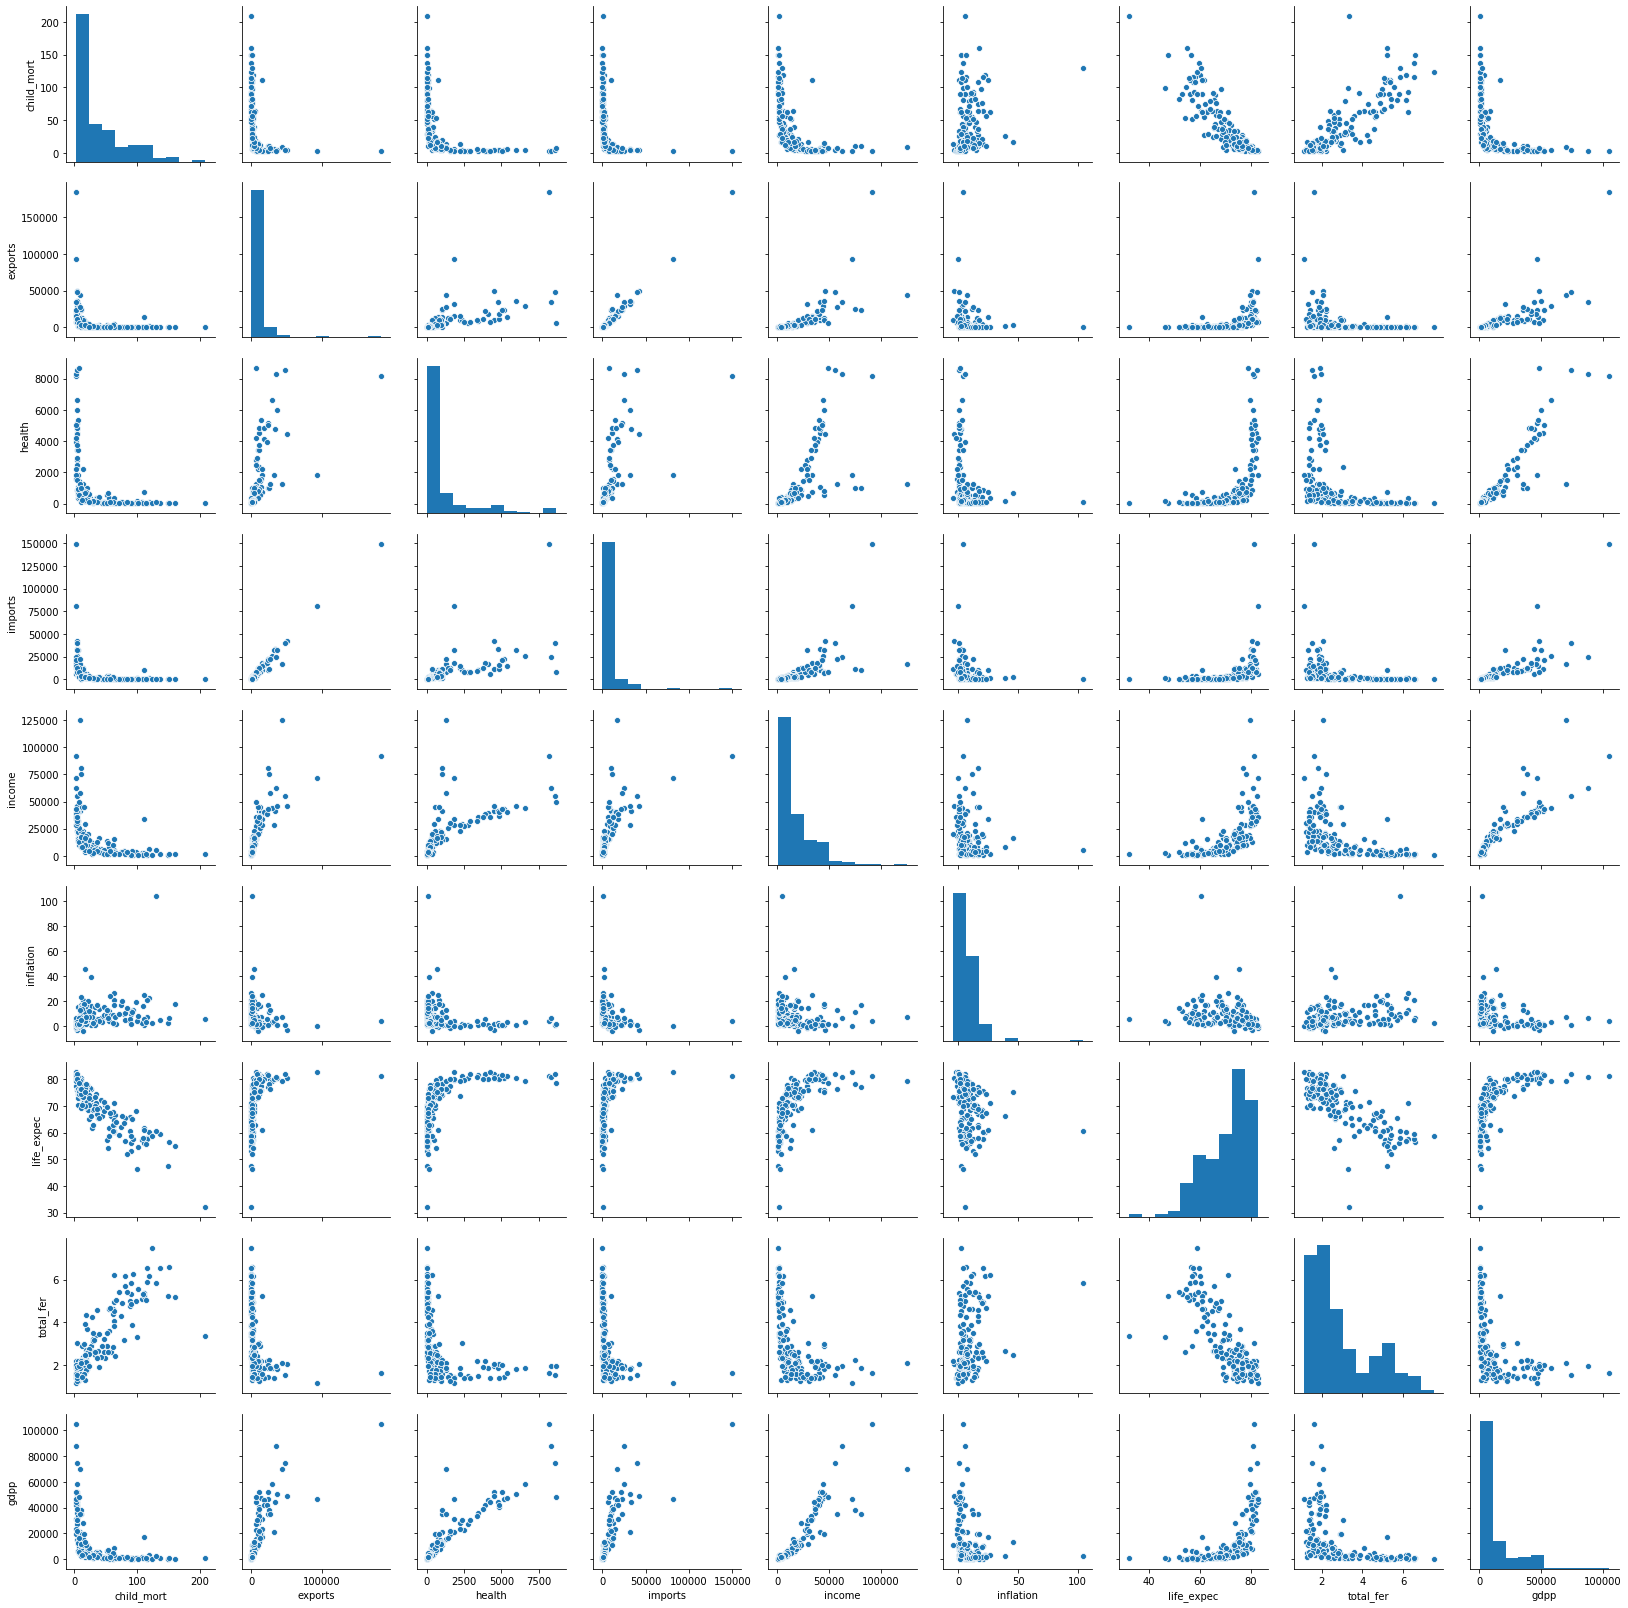

In [174]:
sns.pairplot(Country_Info)
plt.show()

### Checking the Correlation Matrix

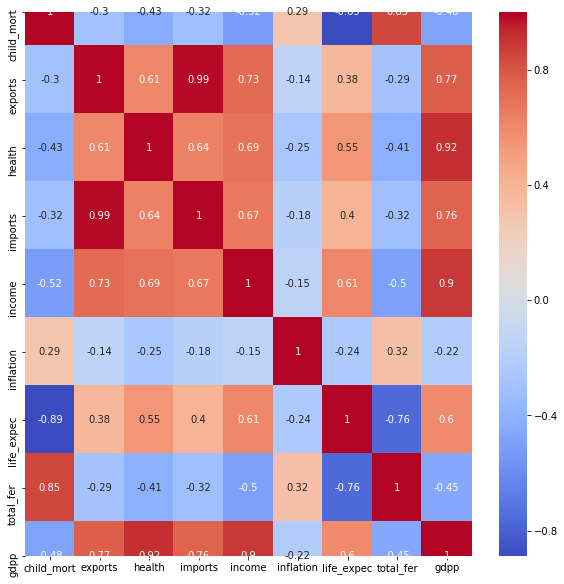

In [175]:
#Creating heatmap 
plt.figure(figsize=(10,10))
sns.heatmap(Country_Info.corr(), annot=True, cmap='coolwarm')

From the above heatmap, we can see that below components are highly correlated with  each other.
 1. exports and imports
 2. health and gdpp
 3. gdpp and income

In [176]:
# We can drop country variable from dataset before scaling it
country = Country_Info.country
Country_Info.drop('country',axis=1,inplace=True)

In [177]:
# checking dataset after dropping the country
Country_Info.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,90.2,55.30,41.9174,248.297,1610.0,9.44,56.2,5.82,553.0
1,16.6,1145.20,267.8950,1987.740,9930.0,4.49,76.3,1.65,4090.0
2,27.3,1712.64,185.9820,1400.440,12900.0,16.10,76.5,2.89,4460.0
3,119.0,2199.19,100.6050,1514.370,5900.0,22.40,60.1,6.16,3530.0
4,10.3,5551.00,735.6600,7185.800,19100.0,1.44,76.8,2.13,12200.0


### Checking for outlier in Data

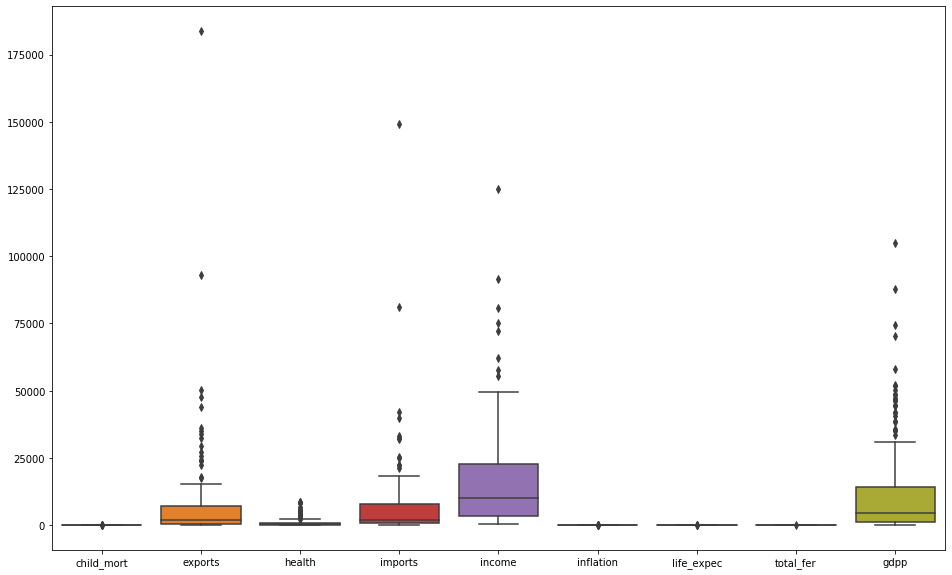

In [178]:
fig = plt.figure(figsize = (16,10))
sns.boxplot(data=Country_Info)
plt.show()

In [179]:
# checking outliers
Country_Info.describe(percentiles=[.01,.25,.5,.75,.90,.95,.99])

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,7420.618847,1056.733204,6588.352108,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,17973.885795,1801.408906,14710.810418,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,1.076920,12.821200,0.651092,609.000000,-4.210000,32.100000,1.150000,231.000000
1%,2.800000,22.243716,17.009362,104.909640,742.240000,-2.348800,47.160000,1.243200,331.620000
25%,8.250000,447.140000,78.535500,640.215000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,1777.440000,321.886000,2045.580000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,7278.000000,976.940000,7719.600000,22800.000000,10.750000,76.800000,3.880000,14050.000000
90%,100.220000,17760.600000,3825.416000,15034.280000,41220.000000,16.640000,80.400000,5.322000,41840.000000
95%,116.000000,31385.100000,4966.701000,24241.560000,48290.000000,20.870000,81.400000,5.861000,48610.000000


## Begin with Data Preparation and Analysis Part

### Scaling the Data

In [180]:
Country_Scaler01 = StandardScaler()

In [181]:
Country_Info1 = Country_Scaler01.fit_transform(Country_Info)

In [182]:
Country_Info1

array([[ 1.29153238, -0.4110113 , -0.56503989, ..., -1.61909203,
         1.90288227, -0.67917961],
       [-0.5389489 , -0.35019096, -0.43921769, ...,  0.64786643,
        -0.85997281, -0.48562324],
       [-0.27283273, -0.31852577, -0.48482608, ...,  0.67042323,
        -0.0384044 , -0.46537561],
       ...,
       [-0.37231541, -0.36146329, -0.53848844, ...,  0.28695762,
        -0.66120626, -0.63775406],
       [ 0.44841668, -0.39216643, -0.55059641, ..., -0.34463279,
         1.14094382, -0.63775406],
       [ 1.11495062, -0.38395214, -0.54049845, ..., -2.09278484,
         1.6246091 , -0.62954556]])

In [183]:
# Checking maximum value 
Country_Info1.max()

9.839814177922182

## Principal Component Analysis(PCA)
 - Executing a Principal Component Analysis(PCA) to the obtained dataframe. 
    This will reduce the number of features from the number of Country Dataset

In [184]:
Country_PCA01 = PCA(svd_solver='randomized', random_state=42)

In [185]:
#Performing and fiting PCA on the dataset

Country_PCA01.fit(Country_Info1)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=42,
    svd_solver='randomized', tol=0.0, whiten=False)

### List of PCA components

In [186]:
Country_PCA01.components_

array([[-0.31639186,  0.34288671,  0.358535  ,  0.34486492,  0.38004113,
        -0.14308531,  0.34385651, -0.30284224,  0.39998795],
       [ 0.47626735,  0.39731091,  0.1550529 ,  0.37078075,  0.12838448,
         0.22126089, -0.36981973,  0.4597152 ,  0.2006241 ],
       [-0.15001225, -0.03057367, -0.07570322, -0.07217386,  0.14576421,
         0.94841868,  0.19675173, -0.07783431,  0.01033941],
       [-0.14805195,  0.44942527, -0.59971228,  0.46179779, -0.15480592,
        -0.00762798, -0.01839465, -0.21392805, -0.36477239],
       [ 0.1019948 , -0.03853829, -0.49319984, -0.2527867 ,  0.79407469,
        -0.13642345, -0.15404105, -0.02033568,  0.08750149],
       [ 0.19658519, -0.03891112,  0.18069888, -0.01217988, -0.03814681,
         0.10840284, -0.58600986, -0.75390075,  0.04538167],
       [ 0.76126725, -0.01366973, -0.06461567,  0.02718244, -0.02311312,
        -0.02207663,  0.58120846, -0.27314534, -0.04402264],
       [ 0.00644411, -0.05526371,  0.43007213,  0.1311355 ,  0

### Checking the variance ratios for each component

In [187]:
Country_PCA01.explained_variance_ratio_

array([5.89372984e-01, 1.84451685e-01, 9.91147170e-02, 6.07227801e-02,
       3.02917253e-02, 2.45982702e-02, 9.39743701e-03, 1.55641971e-03,
       4.93981394e-04])

Text(0.5, 1.0, 'Variance Desc')

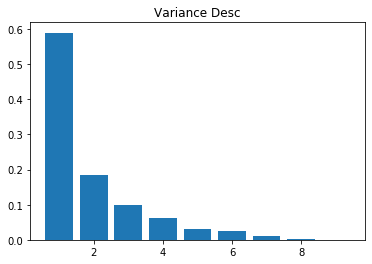

In [188]:
# Bar plot to explain Variance
plt.bar(range(1,len(Country_PCA01.explained_variance_ratio_)+1), Country_PCA01.explained_variance_ratio_ )
plt.title('Variance Desc')

### Plotting the screen plot for the explained variance

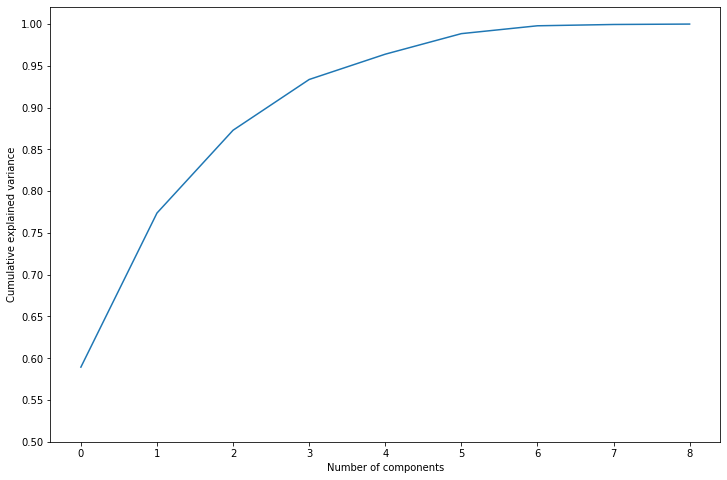

In [189]:
fig = plt.figure(figsize = (12,8))
plt.plot(np.cumsum(Country_PCA01.explained_variance_ratio_))
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')
plt.yticks(np.arange(0.5,1.05,0.05))
plt.savefig("SCREEPLOT",bbox_inches='tight')
plt.show()

 - Around 95% of the information is being explained by 5 components

In [190]:
# Checking and Understaning  how the original 9 variables are loaded on the principal components. It can be verified from above as well.

colnames = list(Country_Info.columns)
pcs_df = pd.DataFrame({ 'Feature':colnames,'PC1':Country_PCA01.components_[0],'PC2':Country_PCA01.components_[1],'PC3':Country_PCA01.components_[2], 
                       'PC4':Country_PCA01.components_[3],'PC5':Country_PCA01.components_[4]})
pcs_df

,Feature,PC1,PC2,PC3,PC4,PC5
0,child_mort,-0.316392,0.476267,-0.150012,-0.148052,0.101995
1,exports,0.342887,0.397311,-0.030574,0.449425,-0.038538
2,health,0.358535,0.155053,-0.075703,-0.599712,-0.493200
3,imports,0.344865,0.370781,-0.072174,0.461798,-0.252787
4,income,0.380041,0.128384,0.145764,-0.154806,0.794075
5,inflation,-0.143085,0.221261,0.948419,-0.007628,-0.136423
6,life_expec,0.343857,-0.369820,0.196752,-0.018395,-0.154041
7,total_fer,-0.302842,0.459715,-0.077834,-0.213928,-0.020336
8,gdpp,0.399988,0.200624,0.010339,-0.364772,0.087501


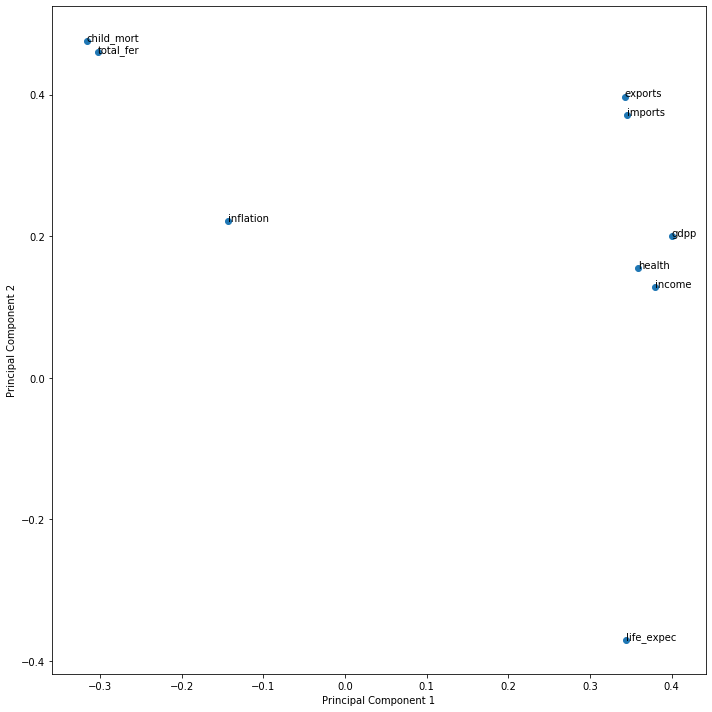

In [191]:
# Let's plot them to visualise how these features are loaded
%matplotlib inline
fig = plt.figure(figsize = (10,10))
plt.scatter(pcs_df.PC1, pcs_df.PC2)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
for i, txt in enumerate(pcs_df.Feature):
    plt.annotate(txt, (pcs_df.PC1[i],pcs_df.PC2[i]))
plt.tight_layout()
plt.show()


### Now performing Incremental PCA with 5 Components

In [192]:
#Finally let's go ahead and do dimenstionality reduction using the five Principal Components
pca_final = IncrementalPCA(n_components=5)

In [193]:
pca_final

IncrementalPCA(batch_size=None, copy=True, n_components=5, whiten=False)

In [194]:
Country_Info2 = pca_final.fit_transform(Country_Info1)
Country_Info2.shape

(167, 5)

In [195]:
Country_Info2

array([[-2.63633780e+00,  1.47225984e+00, -5.48330498e-01,
         2.38302128e-01,  6.10029273e-02],
       [-2.37829162e-02, -1.43553539e+00, -1.54701978e-02,
        -4.28278354e-01, -1.54305141e-01],
       [-4.59228259e-01, -6.79704711e-01,  9.56536815e-01,
        -1.93531315e-01, -9.21275020e-02],
       [-2.72347181e+00,  2.17496646e+00,  5.97396852e-01,
         4.17695067e-01,  5.66944470e-02],
       [ 6.49103499e-01, -1.02640436e+00, -2.58645163e-01,
        -2.76882415e-01,  7.70873177e-02],
       [ 3.59501355e-02, -6.85691881e-01,  1.46841882e+00,
         4.60321765e-02, -9.31926507e-02],
       [-3.34457119e-01, -1.27861656e+00,  1.90805480e-01,
        -4.77018594e-01, -2.53557140e-01],
       [ 3.18403890e+00, -2.39407303e-01, -1.31692434e-01,
         1.67437937e+00,  8.73676249e-02],
       [ 3.81774167e+00,  2.62449000e-01, -2.58554292e-01,
         1.02465750e+00, -2.99611118e-01],
       [-4.68004699e-01, -4.93948233e-01,  6.11513868e-01,
        -2.76290913e-01

### Creating a transpose so that the each column is properly arranged

In [196]:
Country_Info3 = np.transpose(Country_Info2)

### Checking Correlation Matrix for PC

In [197]:
corr = np.corrcoef(Country_Info3)
corr

array([[ 1.00000000e+00,  8.95967973e-04, -3.43490594e-05,
        -3.67755465e-03, -3.09237607e-03],
       [ 8.95967973e-04,  1.00000000e+00,  7.35197281e-05,
        -1.37774134e-02, -1.17495000e-02],
       [-3.43490594e-05,  7.35197281e-05,  1.00000000e+00,
         6.15541928e-05, -5.85496474e-04],
       [-3.67755465e-03, -1.37774134e-02,  6.15541928e-05,
         1.00000000e+00,  4.75010096e-02],
       [-3.09237607e-03, -1.17495000e-02, -5.85496474e-04,
         4.75010096e-02,  1.00000000e+00]])

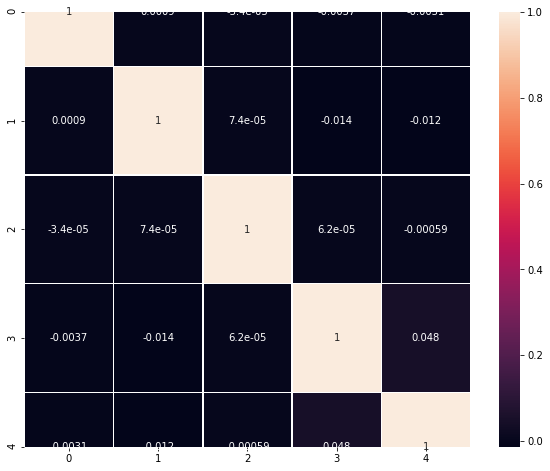

In [198]:
## correlation matrix
%matplotlib inline
plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True, linewidths=0.5)

 - We can see from the above heat map that no components are correlated with each other.

### Creating DataFrame of all 5 Principal Components and Merging country from original dataset back

In [199]:
Country_Info4 = pd.DataFrame({'PC1':Country_Info3[0],'PC2':Country_Info3[1], 'PC3':Country_Info3[2], 
                              'PC4':Country_Info3[3], 'PC5':Country_Info3[4]})
#Country_Info4 = pd.merge(country, Country_Info4, left_index=True, right_index=True)
Country_Info4.head(10)


,PC1,PC2,PC3,PC4,PC5
0,-2.636338,1.472260,-0.548330,0.238302,0.061003
1,-0.023783,-1.435535,-0.015470,-0.428278,-0.154305
2,-0.459228,-0.679705,0.956537,-0.193531,-0.092128
3,-2.723472,2.174966,0.597397,0.417695,0.056694
4,0.649103,-1.026404,-0.258645,-0.276882,0.077087
5,0.035950,-0.685692,1.468419,0.046032,-0.093193
6,-0.334457,-1.278617,0.190805,-0.477019,-0.253557
7,3.184039,-0.239407,-0.131692,1.674379,0.087368
8,3.817742,0.262449,-0.258554,1.024658,-0.299611
9,-0.468005,-0.493948,0.611514,-0.276291,0.115536


### Performing  Outlier Analysis
 - Outlier analysis before proceeding to clustering
 - We can reassign the outliers to the clusters later

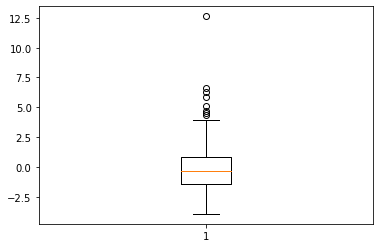

In [200]:
# For PC1
plt.boxplot(Country_Info4.PC1)
QTL1 = Country_Info4.PC1.quantile(0.05)
QTL3 = Country_Info4.PC1.quantile(0.95)
IQR = QTL3 - QTL1
plt.savefig("Boxplot1",bbox_inches='tight')
pcs_df2 = Country_Info4[(Country_Info4.PC1 >= QTL1 - 1.5*IQR) & (Country_Info4.PC1 <= QTL3 + 1.5*IQR)]

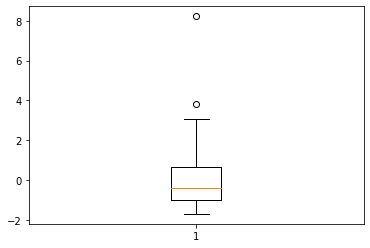

In [201]:
# For PC2
plt.boxplot(Country_Info4.PC2)
QTL1 = Country_Info4.PC2.quantile(0.05)
QTL3 = Country_Info4.PC2.quantile(0.95)
IQR = QTL3 - QTL1
plt.savefig("Boxplot1",bbox_inches='tight')
pcs_df2 = Country_Info4[(Country_Info4.PC2 >= QTL1 - 1.5*IQR) & (Country_Info4.PC2 <= QTL3 + 1.5*IQR)]

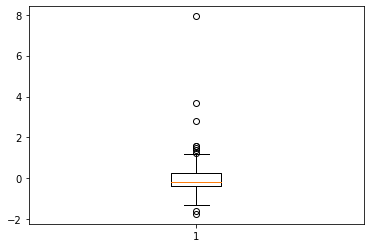

In [202]:
# For PC3
plt.boxplot(Country_Info4.PC3)
QTL1 = Country_Info4.PC3.quantile(0.05)
QTL3 = Country_Info4.PC3.quantile(0.95)
IQR = QTL3 - QTL1
plt.savefig("Boxplot1",bbox_inches='tight')
pcs_df2 = Country_Info4[(Country_Info4.PC3 >= QTL1 - 1.5*IQR) & (Country_Info4.PC3 <= QTL3 + 1.5*IQR)]

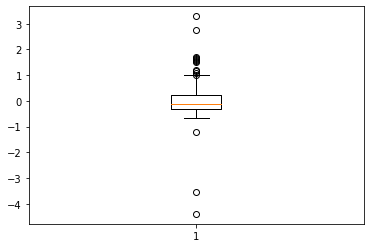

In [203]:
# For PC4
plt.boxplot(Country_Info4.PC4)
QTL1 = Country_Info4.PC4.quantile(0.05)
QTL3 = Country_Info4.PC4.quantile(0.95)
IQR = QTL3 - QTL1
plt.savefig("Boxplot1",bbox_inches='tight')
pcs_df2 = Country_Info4[(Country_Info4.PC4 >= QTL1 - 1.5*IQR) & (Country_Info4.PC4 <= QTL3 + 1.5*IQR)]

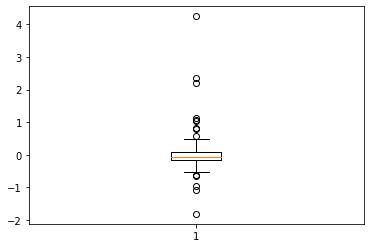

In [204]:
# For PC5
plt.boxplot(Country_Info4.PC5)
QTL1 = Country_Info4.PC5.quantile(0.05)
QTL3 = Country_Info4.PC5.quantile(0.95)
IQR = QTL3 - QTL1
plt.savefig("Boxplot1",bbox_inches='tight')
pcs_df2 = Country_Info4[(Country_Info4.PC5 >= QTL1 - 1.5*IQR) & (Country_Info4.PC5 <= QTL3 + 1.5*IQR)]

In [205]:
#Inspecting shape after outlier removal
pcs_df2.shape

(164, 5)

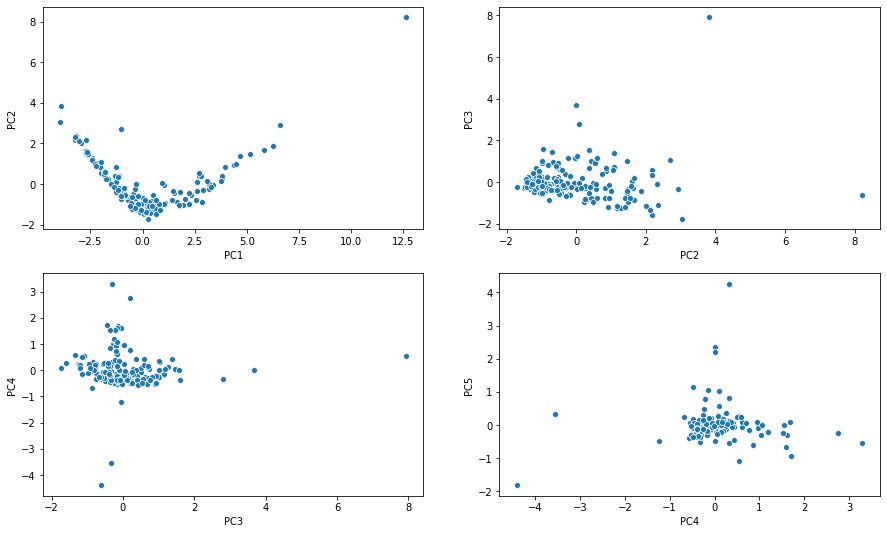

In [206]:
# Scatter plot to visualize the outlier
fig = plt.figure(figsize = (15,9))

plt.subplot(2, 2, 1)
sns.scatterplot(x='PC1',y='PC2',data=Country_Info4)

plt.subplot(2, 2, 2)
sns.scatterplot(x='PC2',y='PC3',data=Country_Info4)

plt.subplot(2, 2, 3)
sns.scatterplot(x='PC3',y='PC4',data=Country_Info4)

plt.subplot(2, 2, 4)
sns.scatterplot(x='PC4',y='PC5',data=Country_Info4)

plt.savefig("scatterplot",bbox_inches='tight')

## Performing Clustering Process
### Clustering - K-Means
### Performing the Hopekins Statistic

In [207]:
#Calculating the Hopkins statistic

from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
import numpy as np
from math import isnan
 
def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H

In [208]:
# ChecKing Hopkins measure 
hopkins(Country_Info4)

0.9394474048460832

 Since the value is greater than 0.5, the given dataset has a good tendency to form the clusters.

In [209]:
Country_Info5 = Country_Info4

In [210]:
Country_Info5.head()

,PC1,PC2,PC3,PC4,PC5
0,-2.636338,1.472260,-0.548330,0.238302,0.061003
1,-0.023783,-1.435535,-0.015470,-0.428278,-0.154305
2,-0.459228,-0.679705,0.956537,-0.193531,-0.092128
3,-2.723472,2.174966,0.597397,0.417695,0.056694
4,0.649103,-1.026404,-0.258645,-0.276882,0.077087


### Modeling :Finding the Optimal Number of Clusters
 - SSD

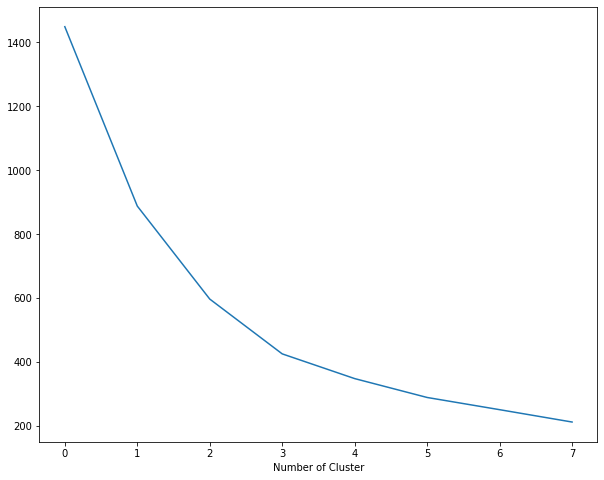

In [211]:
# elbow-curve/SSD
fig = plt.figure(figsize=[10,8])
ssd = []
range_n_clusters = [1,2, 3, 4, 5, 6, 7, 8]
for num_clusters in range_n_clusters:
    k_means01 = KMeans(n_clusters=num_clusters, max_iter=50)
    k_means01.fit(Country_Info5)
    
    ssd.append(k_means01.inertia_)
    
# plot the SSDs for each n_clusters
# ssd
plt.plot(ssd)
plt.xlabel("Number of Cluster")
plt.savefig("elowcurve",bbox_inches='tight')

### Silhouette Analysis
 - Performing the K-means using K = 3 as per Elbow curve result.

In [212]:
from sklearn.metrics import silhouette_score
sse_ = []
for k in range(2, 10):
    k_means01 = KMeans(n_clusters=k).fit(Country_Info5)
    sse_.append([k, silhouette_score(Country_Info5, k_means01.labels_)])

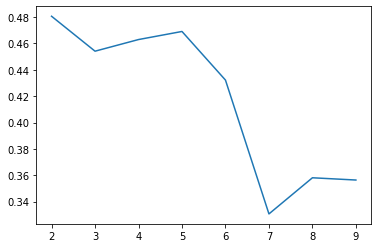

In [213]:
plt.plot(pd.DataFrame(sse_)[0], pd.DataFrame(sse_)[1]);

In [214]:
# silhouette analysis
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]

for num_clusters in range_n_clusters:
    
    # intialise k_means01
    k_means01 = KMeans(n_clusters=num_clusters, max_iter=50)
    k_means01.fit(Country_Info5)
    
    cluster_labels = k_means01.labels_
    
    # silhouette score
    silhouette_avg = silhouette_score(Country_Info5, cluster_labels)
    print("For n_clusters={0}, the silhouette score is {1}".format(num_clusters, silhouette_avg))

For n_clusters=2, the silhouette score is 0.48066046782755933
For n_clusters=3, the silhouette score is 0.45415128979715086
For n_clusters=4, the silhouette score is 0.46298146414826113
For n_clusters=5, the silhouette score is 0.46730543907272426
For n_clusters=6, the silhouette score is 0.34118575856776556
For n_clusters=7, the silhouette score is 0.3542181456884909
For n_clusters=8, the silhouette score is 0.35427359823861077


#### As per the Elbow cure we decide to choose K = 3
 - we're seeing a distinct bend at around 3 clusters. Hence it seems a good K to choose.
 - performing K means using K=3

In [215]:
# final model with k=2
k_means01 = KMeans(n_clusters=3, max_iter=50,random_state = 50)
k_means01.fit(Country_Info5)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=50,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=50, tol=0.0001, verbose=0)

In [216]:
k_means01.labels_

array([2, 1, 1, 2, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 2, 1, 1, 1, 2,
       1, 0, 1, 2, 2, 1, 2, 0, 1, 2, 2, 1, 1, 1, 2, 2, 2, 1, 2, 1, 0, 1,
       0, 1, 1, 1, 1, 2, 2, 1, 1, 0, 0, 2, 2, 1, 0, 2, 1, 1, 1, 2, 2, 1,
       2, 1, 0, 1, 1, 1, 2, 0, 1, 0, 1, 0, 1, 1, 2, 2, 0, 1, 2, 1, 1, 2,
       2, 1, 1, 0, 1, 2, 2, 1, 1, 2, 0, 2, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1,
       0, 0, 2, 2, 0, 1, 2, 1, 1, 1, 1, 1, 1, 0, 1, 1, 2, 1, 1, 2, 1, 1,
       2, 0, 1, 1, 2, 2, 1, 0, 1, 1, 2, 1, 0, 0, 1, 2, 1, 2, 2, 1, 1, 1,
       1, 2, 1, 0, 0, 0, 1, 1, 1, 1, 1, 2, 2])

In [217]:
# Assigning the label
Country_Info5['ClusterId(K-means)'] = k_means01.labels_
Country_Info5.head()

,PC1,PC2,PC3,PC4,PC5,ClusterId(K-means)
0,-2.636338,1.472260,-0.548330,0.238302,0.061003,2
1,-0.023783,-1.435535,-0.015470,-0.428278,-0.154305,1
2,-0.459228,-0.679705,0.956537,-0.193531,-0.092128,1
3,-2.723472,2.174966,0.597397,0.417695,0.056694,2
4,0.649103,-1.026404,-0.258645,-0.276882,0.077087,1


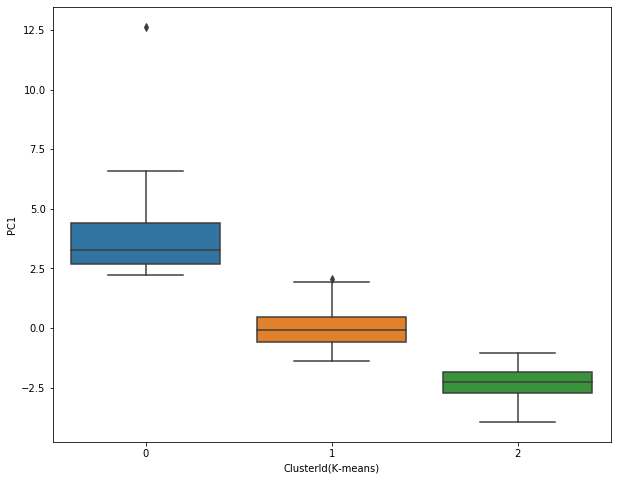

In [218]:
# plot
fig = plt.figure(figsize=[10,8])
sns.boxplot(x='ClusterId(K-means)', y='PC1', data=Country_Info5)

In [219]:
Country_Info5['ClusterId(K-means)'].value_counts()

1    91
2    48
0    28
Name: ClusterId(K-means), dtype: int64

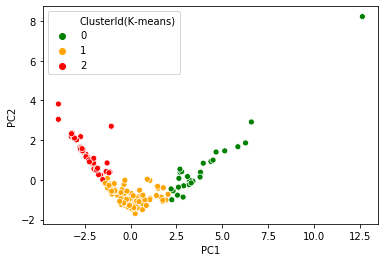

In [220]:
# Creating a scatter plot to visualise distribution of countries
sns.scatterplot(x='PC1',y='PC2',hue='ClusterId(K-means)',legend='full',data=Country_Info5, palette=['green','orange','red'])

### Merging the original data with the data(ClusterID)

In [221]:
# Merging the Country with original Dataset
Country_Info6 = pd.concat([country,Country_Info], axis=1)
Country_Info6.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,55.30,41.9174,248.297,1610.0,9.44,56.2,5.82,553.0
1,Albania,16.6,1145.20,267.8950,1987.740,9930.0,4.49,76.3,1.65,4090.0
2,Algeria,27.3,1712.64,185.9820,1400.440,12900.0,16.10,76.5,2.89,4460.0
3,Angola,119.0,2199.19,100.6050,1514.370,5900.0,22.40,60.1,6.16,3530.0
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100.0,1.44,76.8,2.13,12200.0


In [222]:
Country_Info_final = pd.concat([Country_Info6,Country_Info5], axis=1)
Country_Info_final.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,PC1,PC2,PC3,PC4,PC5,ClusterId(K-means)
0,Afghanistan,90.2,55.30,41.9174,248.297,1610.0,9.44,56.2,5.82,553.0,-2.636338,1.472260,-0.548330,0.238302,0.061003,2
1,Albania,16.6,1145.20,267.8950,1987.740,9930.0,4.49,76.3,1.65,4090.0,-0.023783,-1.435535,-0.015470,-0.428278,-0.154305,1
2,Algeria,27.3,1712.64,185.9820,1400.440,12900.0,16.10,76.5,2.89,4460.0,-0.459228,-0.679705,0.956537,-0.193531,-0.092128,1
3,Angola,119.0,2199.19,100.6050,1514.370,5900.0,22.40,60.1,6.16,3530.0,-2.723472,2.174966,0.597397,0.417695,0.056694,2
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100.0,1.44,76.8,2.13,12200.0,0.649103,-1.026404,-0.258645,-0.276882,0.077087,1


### Droping all the Principal Components from the dataset as we dont need for any further analysis

In [223]:
Country_Info_final=Country_Info_final.drop(['PC1','PC2','PC3','PC4','PC5'],axis=1)
Country_Info_final.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,ClusterId(K-means)
0,Afghanistan,90.2,55.30,41.9174,248.297,1610.0,9.44,56.2,5.82,553.0,2
1,Albania,16.6,1145.20,267.8950,1987.740,9930.0,4.49,76.3,1.65,4090.0,1
2,Algeria,27.3,1712.64,185.9820,1400.440,12900.0,16.10,76.5,2.89,4460.0,1
3,Angola,119.0,2199.19,100.6050,1514.370,5900.0,22.40,60.1,6.16,3530.0,2
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100.0,1.44,76.8,2.13,12200.0,1


### Analysing the K-means cluster

In [224]:
# Profiling the cluster by taking the mean of various attributes

cluster_child_mort = pd.DataFrame(Country_Info_final.groupby(["ClusterId(K-means)"]).child_mort.mean())
cluster_exports    = pd.DataFrame(Country_Info_final.groupby(["ClusterId(K-means)"]).exports.mean())
cluster_health     = pd.DataFrame(Country_Info_final.groupby(["ClusterId(K-means)"]).health.mean())
cluster_imports    = pd.DataFrame(Country_Info_final.groupby(["ClusterId(K-means)"]).imports.mean())
cluster_income     = pd.DataFrame(Country_Info_final.groupby(["ClusterId(K-means)"]).income.mean())
cluster_inflation  = pd.DataFrame(Country_Info_final.groupby(["ClusterId(K-means)"]).inflation.mean())
cluster_life_expec = pd.DataFrame(Country_Info_final.groupby(["ClusterId(K-means)"]).life_expec.mean())
cluster_total_fer  = pd.DataFrame(Country_Info_final.groupby(["ClusterId(K-means)"]).total_fer.mean())
cluster_GDPP       = pd.DataFrame(Country_Info_final.groupby(["ClusterId(K-means)"]).gdpp.mean())

### Concat the result with the Cluster ID

In [225]:
Country_Info_final1 = pd.concat([cluster_child_mort,cluster_exports,cluster_health,cluster_imports,cluster_income,
                            cluster_inflation,cluster_life_expec,cluster_total_fer,cluster_GDPP], axis=1)

In [226]:
Country_Info_final1.columns = ["child_mort","exports","health","imports","income","inflation","life_expec","total_fer","gdpp"]
Country_Info_final1

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
ClusterId(K-means),,,,,,,,,
0,5.046429,31038.239286,4327.163214,25818.100000,50178.571429,3.014679,80.514286,1.760714,48114.285714
1,20.357143,3604.149434,547.279455,3710.446386,13968.021978,7.070549,73.460440,2.235055,7979.912088
2,91.610417,879.063521,114.821765,827.028771,3897.354167,11.911146,59.239583,4.992083,1909.208333


### Defining Cluster as the above details.
 - 0 for 'Developed Countries'
 - 1 for 'Developing Countries'
 - 2 for 'Under-developed Countries'

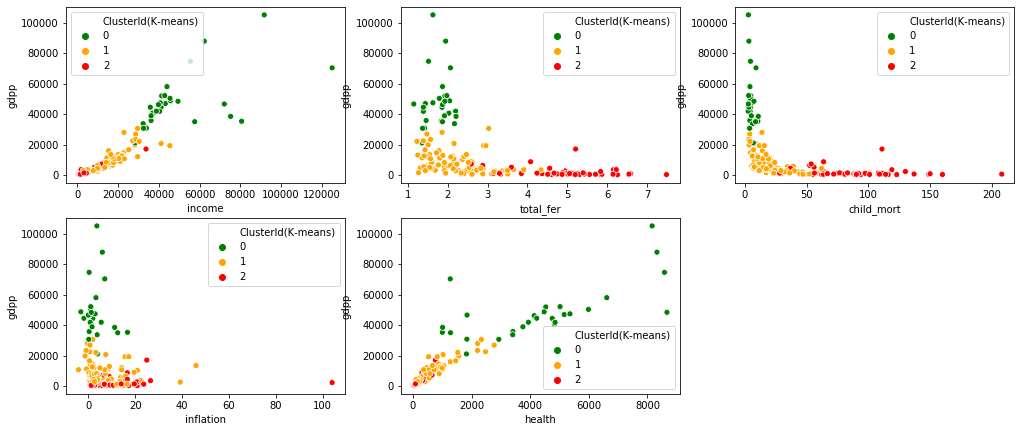

In [227]:
fig = plt.figure(figsize = (17,11))

plt.subplot(3, 3, 1)
sns.scatterplot(x='income',y='gdpp',hue='ClusterId(K-means)',legend='full',data=Country_Info_final, palette=['green','orange','red']) 

plt.subplot(3, 3, 2)
sns.scatterplot(x='total_fer',y='gdpp',hue='ClusterId(K-means)',legend='full',data=Country_Info_final, palette=['green','orange','red'])

plt.subplot(3, 3, 3)
sns.scatterplot(x='child_mort',y='gdpp',hue='ClusterId(K-means)',legend='full',data=Country_Info_final, palette=['green','orange','red'])

plt.subplot(3, 3, 4)
sns.scatterplot(x='inflation',y='gdpp',hue='ClusterId(K-means)',legend='full',data=Country_Info_final, palette=['green','orange','red'])

plt.subplot(3, 3, 5)
sns.scatterplot(x='health',y='gdpp',hue='ClusterId(K-means)',legend='full',data=Country_Info_final, palette=['green','orange','red'])

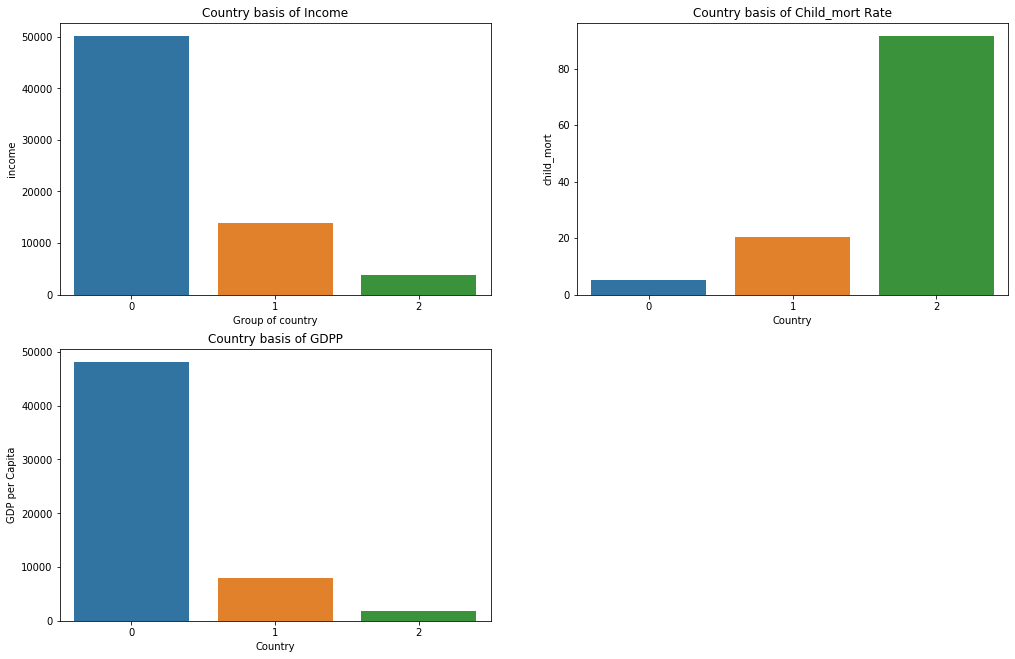

In [228]:
fig = plt.figure(figsize = (17,11))
# plot 1
plt.subplot(2, 2, 1)
sns.barplot(x=Country_Info_final1.index,y='income',data=Country_Info_final1)
plt.xlabel('Group of country', fontsize=10)
plt.title('Country basis of Income')

# plot 2
plt.subplot(2, 2, 2)
sns.barplot(x=Country_Info_final1.index,y='child_mort',data=Country_Info_final1)
plt.xlabel('Country', fontsize=10)
plt.title('Country basis of Child_mort Rate')

plt.subplot(2, 2, 3)
sns.barplot(x=Country_Info_final1.index,y='gdpp',data=Country_Info_final1)
plt.xlabel('Country', fontsize=10)
plt.ylabel('GDP per Capita', fontsize=10)
plt.title('Country basis of GDPP')


plt.show()

#### From the plots above, we come to the conclusions that:

 - PLOT 1 : Bar chart shows, all the developed countries are having high income per person, developing countries are having average income per person and poor countries are having the least income per person.

 - PLOT 2 : As we see in plot all the developed countries having low number of death of children , developing countries having average death and poor countries having the most death rate.

 - PLOT 3 : As we see in plot Developed country having High GDPP per capita , Developing country having Average GDPP per capita and Poor country having low GDPP per capita

#### Let see which countries require assistance are those which have all the metrics below average in their cluster, ie cluster 2

In [229]:
fin=Country_Info_final[Country_Info_final['gdpp']<=1909.208333]
fin=fin[fin['child_mort']>=91.610417]
fin=fin[fin['income']<=3897.354167]


In [230]:
fin

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,ClusterId(K-means)
17,Benin,111.0,180.4040,31.0780,281.976,1820.0,0.885,61.8,5.36,758.0,2
25,Burkina Faso,116.0,110.4000,38.7550,170.200,1430.0,6.810,57.9,5.87,575.0,2
26,Burundi,93.6,20.6052,26.7960,90.552,764.0,12.300,57.7,6.26,231.0,2
28,Cameroon,108.0,290.8200,67.2030,353.700,2660.0,1.910,57.3,5.11,1310.0,2
31,Central African Republic,149.0,52.6280,17.7508,118.190,888.0,2.010,47.5,5.21,446.0,2
32,Chad,150.0,330.0960,40.6341,390.195,1930.0,6.390,56.5,6.59,897.0,2
37,"Congo, Dem. Rep.",116.0,137.2740,26.4194,165.664,609.0,20.800,57.5,6.54,334.0,2
40,Cote d'Ivoire,111.0,617.3200,64.6600,528.260,2690.0,5.390,56.3,5.27,1220.0,2
63,Guinea,109.0,196.3440,31.9464,279.936,1190.0,16.100,58.0,5.34,648.0,2
64,Guinea-Bissau,114.0,81.5030,46.4950,192.544,1390.0,2.970,55.6,5.05,547.0,2


#### Problem Statement- Analyse the clusters and identify the ones which are in dire need of aid. You can analyse the clusters by comparing how these three variables - [gdpp, child_mort and income] 
#### Solution- As per the above chart the below country belong to cluster 2 that is 'Under-developed Countries' dire need of aid.
 - Benin
 - Bukrina Faso
 - Burundi
 - Cameroon
 - Central African Republic
 - Chad
 - Congo, Dem. Rep.
 - Cote d'Ivoire
 - Guinea
 - Guinea-Bissau
 - Haiti 
 - Lesotho
 - Mali
 - Mauritania
 - Mozambique
 - Niger
 - Sierra Leone

### Analysis by using Heirarchical clustering¶

In [231]:
Country_Info5.head()

,PC1,PC2,PC3,PC4,PC5,ClusterId(K-means)
0,-2.636338,1.472260,-0.548330,0.238302,0.061003,2
1,-0.023783,-1.435535,-0.015470,-0.428278,-0.154305,1
2,-0.459228,-0.679705,0.956537,-0.193531,-0.092128,1
3,-2.723472,2.174966,0.597397,0.417695,0.056694,2
4,0.649103,-1.026404,-0.258645,-0.276882,0.077087,1


In [232]:
# Drpoing the ClusterId(K-means) from the data set
Country_Info5.drop('ClusterId(K-means)',axis=1,inplace=True)

In [233]:
Country_Info5.head()

,PC1,PC2,PC3,PC4,PC5
0,-2.636338,1.472260,-0.548330,0.238302,0.061003
1,-0.023783,-1.435535,-0.015470,-0.428278,-0.154305
2,-0.459228,-0.679705,0.956537,-0.193531,-0.092128
3,-2.723472,2.174966,0.597397,0.417695,0.056694
4,0.649103,-1.026404,-0.258645,-0.276882,0.077087


### Heirarchical clustering using single linkage

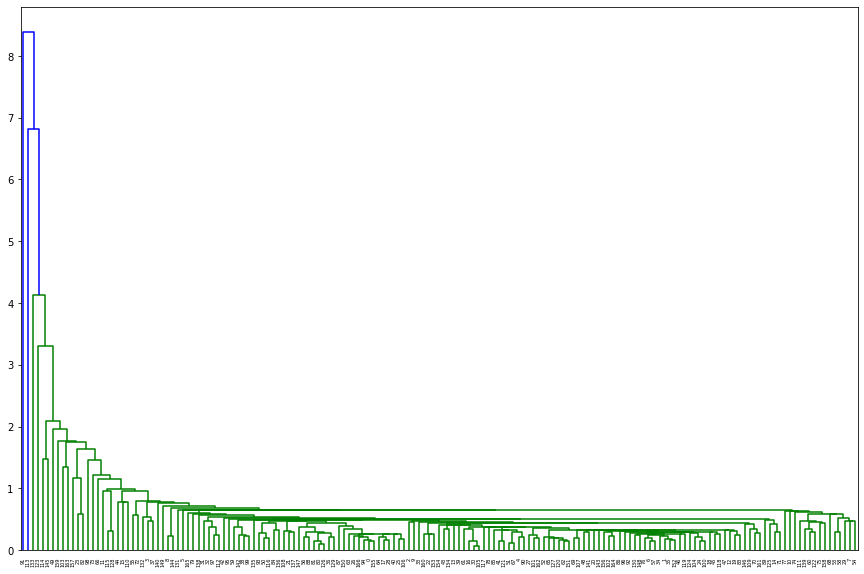

In [234]:
# HC single linkage
fig = plt.figure(figsize=[15,10])
merging = linkage(Country_Info5, method="single", metric='euclidean')
dendrogram(merging)
plt.show()

By single linkage heirarchical clustering things are not clear, so let us go for complete linkage heirarchical clustering method

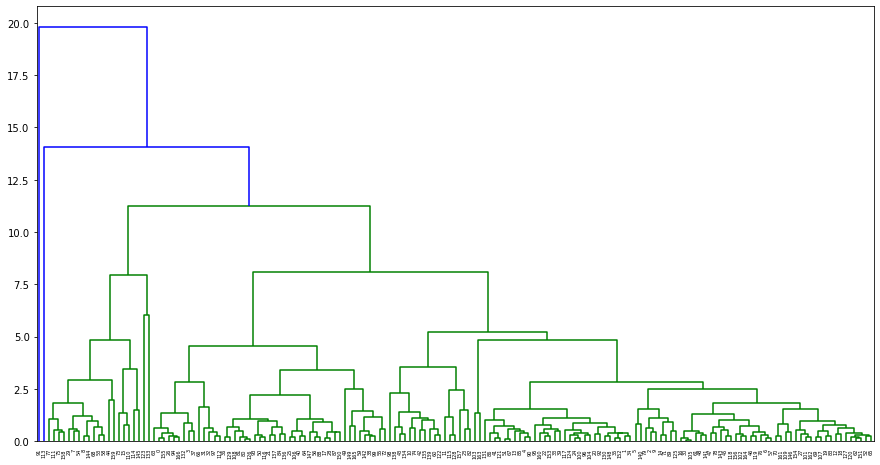

In [235]:
# HC complete linkage
fig = plt.figure(figsize=[15,8])
merging = linkage(Country_Info5, method="complete", metric='euclidean')
dendrogram(merging)
plt.show()

In [236]:
# From the Complete linkage decided to cut the tree at 3 cluster
cluster_labels = cut_tree(merging, n_clusters=3).reshape(-1, )
cluster_labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [237]:
# Assigning cluster labels

Country_Info5['Cluster_lables(H)']=cluster_labels
Country_Info5.head()

,PC1,PC2,PC3,PC4,PC5,Cluster_lables(H)
0,-2.636338,1.472260,-0.548330,0.238302,0.061003,0
1,-0.023783,-1.435535,-0.015470,-0.428278,-0.154305,0
2,-0.459228,-0.679705,0.956537,-0.193531,-0.092128,0
3,-2.723472,2.174966,0.597397,0.417695,0.056694,0
4,0.649103,-1.026404,-0.258645,-0.276882,0.077087,0


In [238]:
Country_Info5['Cluster_lables(H)'].value_counts()

0    165
2      1
1      1
Name: Cluster_lables(H), dtype: int64

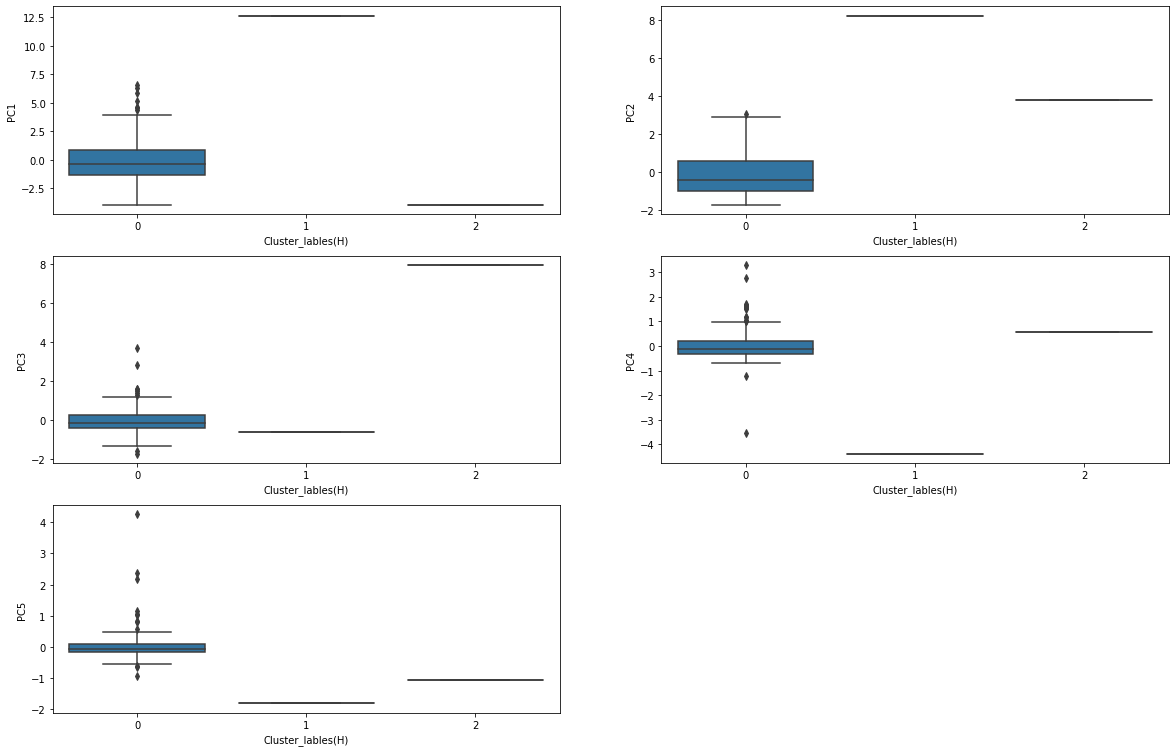

In [239]:
# plot
fig = plt.figure(figsize=[20,13])
plt.subplot(3, 2, 1)
sns.boxplot(x='Cluster_lables(H)', y='PC1', data=Country_Info5)

plt.subplot(3, 2, 2)
sns.boxplot(x='Cluster_lables(H)', y='PC2', data=Country_Info5)

plt.subplot(3, 2, 3)
sns.boxplot(x='Cluster_lables(H)', y='PC3', data=Country_Info5)

plt.subplot(3, 2, 4)
sns.boxplot(x='Cluster_lables(H)', y='PC4', data=Country_Info5)

plt.subplot(3, 2, 5)
sns.boxplot(x='Cluster_lables(H)', y='PC5', data=Country_Info5)

In [240]:
Country_Info_final.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,ClusterId(K-means)
0,Afghanistan,90.2,55.30,41.9174,248.297,1610.0,9.44,56.2,5.82,553.0,2
1,Albania,16.6,1145.20,267.8950,1987.740,9930.0,4.49,76.3,1.65,4090.0,1
2,Algeria,27.3,1712.64,185.9820,1400.440,12900.0,16.10,76.5,2.89,4460.0,1
3,Angola,119.0,2199.19,100.6050,1514.370,5900.0,22.40,60.1,6.16,3530.0,2
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100.0,1.44,76.8,2.13,12200.0,1


In [241]:
Country_Info7 = pd.merge(Country_Info_final,Country_Info5, left_index=True,right_index=True)
Country_Info7.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,ClusterId(K-means),PC1,PC2,PC3,PC4,PC5,Cluster_lables(H)
0,Afghanistan,90.2,55.30,41.9174,248.297,1610.0,9.44,56.2,5.82,553.0,2,-2.636338,1.472260,-0.548330,0.238302,0.061003,0
1,Albania,16.6,1145.20,267.8950,1987.740,9930.0,4.49,76.3,1.65,4090.0,1,-0.023783,-1.435535,-0.015470,-0.428278,-0.154305,0
2,Algeria,27.3,1712.64,185.9820,1400.440,12900.0,16.10,76.5,2.89,4460.0,1,-0.459228,-0.679705,0.956537,-0.193531,-0.092128,0
3,Angola,119.0,2199.19,100.6050,1514.370,5900.0,22.40,60.1,6.16,3530.0,2,-2.723472,2.174966,0.597397,0.417695,0.056694,0
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100.0,1.44,76.8,2.13,12200.0,1,0.649103,-1.026404,-0.258645,-0.276882,0.077087,0


In [242]:
Country_Info7=Country_Info7.drop(['PC1','PC2','PC3','PC4','PC5'],axis=1)
Country_Info7.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,ClusterId(K-means),Cluster_lables(H)
0,Afghanistan,90.2,55.30,41.9174,248.297,1610.0,9.44,56.2,5.82,553.0,2,0
1,Albania,16.6,1145.20,267.8950,1987.740,9930.0,4.49,76.3,1.65,4090.0,1,0
2,Algeria,27.3,1712.64,185.9820,1400.440,12900.0,16.10,76.5,2.89,4460.0,1,0
3,Angola,119.0,2199.19,100.6050,1514.370,5900.0,22.40,60.1,6.16,3530.0,2,0
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100.0,1.44,76.8,2.13,12200.0,1,0


### Analysis of the Hierarchical clusters

In [243]:
cluster_child_mort = pd.DataFrame(Country_Info7.groupby(["Cluster_lables(H)"]).child_mort.mean())
cluster_exports    = pd.DataFrame(Country_Info7.groupby(["Cluster_lables(H)"]).exports.mean())
cluster_health     = pd.DataFrame(Country_Info7.groupby(["Cluster_lables(H)"]).health.mean())
cluster_imports    = pd.DataFrame(Country_Info7.groupby(["Cluster_lables(H)"]).imports.mean())
cluster_income     = pd.DataFrame(Country_Info7.groupby(["Cluster_lables(H)"]).income.mean())
cluster_inflation  = pd.DataFrame(Country_Info7.groupby(["Cluster_lables(H)"]).inflation.mean())
cluster_life_expec = pd.DataFrame(Country_Info7.groupby(["Cluster_lables(H)"]).life_expec.mean())
cluster_total_fer  = pd.DataFrame(Country_Info7.groupby(["Cluster_lables(H)"]).total_fer.mean())
cluster_GDPP       = pd.DataFrame(Country_Info7.groupby(["Cluster_lables(H)"]).gdpp.mean())

In [244]:
Country_Info_final2 = pd.concat([cluster_child_mort,cluster_exports,cluster_health,cluster_imports,cluster_income,
                            cluster_inflation,cluster_life_expec,cluster_total_fer,cluster_GDPP], axis=1)

In [245]:
Country_Info_final2.columns = ["child_mort","exports","health","imports","income","inflation","life_expec","total_fer","gdpp"]
Country_Info_final2

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
Cluster_lables(H),,,,,,,,,
0,37.929091,6393.356712,1019.380692,5762.117467,16765.533333,7.223915,70.551515,2.938424,12470.812121
1,2.800000,183750.000000,8158.500000,149100.000000,91700.000000,3.620000,81.300000,1.630000,105000.000000
2,130.000000,589.490000,118.131000,405.420000,5150.000000,104.000000,60.500000,5.840000,2330.000000


In [246]:
# Merging the Country with original Dataset
Country_Info8 = pd.concat([country,Country_Info], axis=1)
Country_Info8.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,55.30,41.9174,248.297,1610.0,9.44,56.2,5.82,553.0
1,Albania,16.6,1145.20,267.8950,1987.740,9930.0,4.49,76.3,1.65,4090.0
2,Algeria,27.3,1712.64,185.9820,1400.440,12900.0,16.10,76.5,2.89,4460.0
3,Angola,119.0,2199.19,100.6050,1514.370,5900.0,22.40,60.1,6.16,3530.0
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100.0,1.44,76.8,2.13,12200.0


In [247]:
#Let's use the concept of binning
fin1=Country_Info7[Country_Info7['gdpp']<=2330.000000]
fin1=fin[fin['child_mort']>= 130.000000]
fin1=fin[fin['income']<= 5150.000000]

In [248]:
fin1=pd.merge(fin1,Country_Info4,left_index=True,right_index=True)

In [249]:
fin1=fin1.drop(['PC1','PC2','PC3','PC4','PC5'],axis=1)
fin1.shape

(17, 12)

In [250]:
fin1

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,ClusterId(K-means),Cluster_lables(H)
17,Benin,111.0,180.4040,31.0780,281.976,1820.0,0.885,61.8,5.36,758.0,2,0
25,Burkina Faso,116.0,110.4000,38.7550,170.200,1430.0,6.810,57.9,5.87,575.0,2,0
26,Burundi,93.6,20.6052,26.7960,90.552,764.0,12.300,57.7,6.26,231.0,2,0
28,Cameroon,108.0,290.8200,67.2030,353.700,2660.0,1.910,57.3,5.11,1310.0,2,0
31,Central African Republic,149.0,52.6280,17.7508,118.190,888.0,2.010,47.5,5.21,446.0,2,0
32,Chad,150.0,330.0960,40.6341,390.195,1930.0,6.390,56.5,6.59,897.0,2,0
37,"Congo, Dem. Rep.",116.0,137.2740,26.4194,165.664,609.0,20.800,57.5,6.54,334.0,2,0
40,Cote d'Ivoire,111.0,617.3200,64.6600,528.260,2690.0,5.390,56.3,5.27,1220.0,2,0
63,Guinea,109.0,196.3440,31.9464,279.936,1190.0,16.100,58.0,5.34,648.0,2,0
64,Guinea-Bissau,114.0,81.5030,46.4950,192.544,1390.0,2.970,55.6,5.05,547.0,2,0


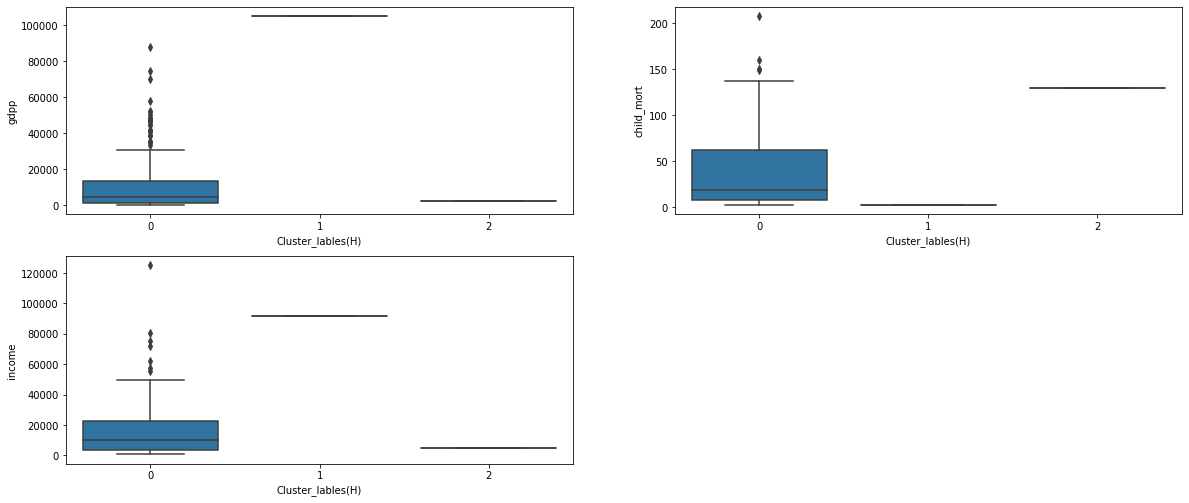

In [251]:
# plot
fig = plt.figure(figsize=[20,13])
plt.subplot(3, 2, 1)
sns.boxplot(x='Cluster_lables(H)',y='gdpp',data=Country_Info7)


plt.subplot(3, 2, 2)
sns.boxplot(x='Cluster_lables(H)',y='child_mort',data=Country_Info7)


plt.subplot(3, 2, 3)
sns.boxplot(x='Cluster_lables(H)',y='income',data=Country_Info7)
plt.show()

 - PLOT 1- Developed countries are falling under 2nd cluster because of high gdpp range. 
 - PLOT 2- Poor countries are falling under cluster 0. So, the child_mort rate is more in these countries. 
 - PLOT 3- Developed countries are falling under cluster 1,the income is in high range

## CONCLUSION

After doing analysis by both K-means clustering and Heirarchical clustring, we found that in both the analaysis top 5 countries are the same. Hence, we are considering the analysis found in the final outcome by K means.
    
    
#### Below are the top 5 countries which are in direst need of aid as per analysis work that we performed.

1. Benin
2. Bukrina Faso
3. Burundi
4. Cameroon
5. Central African Republic
